In [1]:
from experiment import add_experiment
from experiment_tracking import read_experiments, get_results_file, get_baseline, load_experiments
from evaluation import test_colour_model, colour_probs, colour_dict, name_to_rgb
from util import add_config_option, create_experiment

%matplotlib inline

In [16]:
read_experiments()

,config_name,experiment_file,neural_config,status
index,,,,
0,None,None,None,None
1,simple_neural,results/simplecolours/agents.NeuralCorrectingA...,DEFAULT,done
2,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:0.1,done
3,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:1,done
4,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0,done
5,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0.4,done
6,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
7,tworules_no_update,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
8,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done


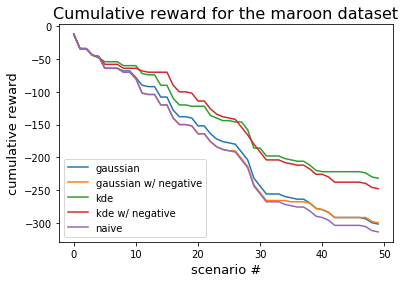

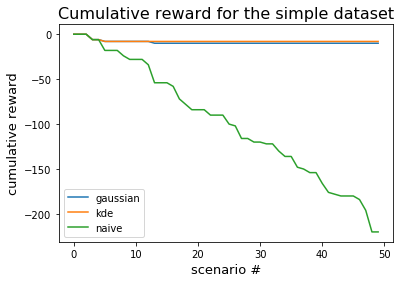

In [2]:
exp = load_experiments([53, 60], 'simple')
exp.plot(labels=['gaussian', 'kde', 'naive'])

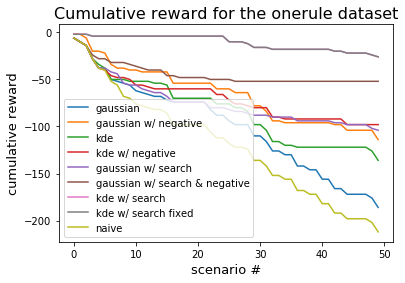

In [17]:
#exp = load_experiments([11, 12, 61, 62], 'onerule')
exp = load_experiments([72, 73, 61, 62, 119, 120, 130, 107], 'onerule')
exp.plot(labels=['gaussian', 'gaussian w/ negative', 'kde', 'kde w/ negative', 
                 'gaussian w/ search', 'gaussian w/ search & negative',  'kde w/ search', 
                 'kde w/ search fixed', 'naive'])

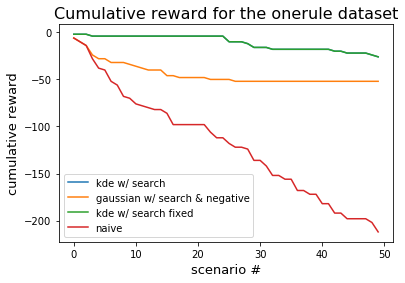

In [18]:
exp = load_experiments([107, 120, 130], 'onerule')
exp.plot(labels=['kde w/ search', 'gaussian w/ search & negative', 'kde w/ search fixed', 'naive'])

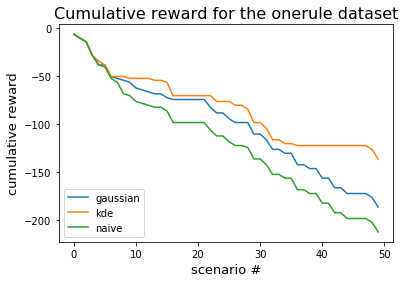

In [16]:
exp = load_experiments([72, 61], 'onerule')
exp.plot(labels=['gaussian', 'kde', 'naive'])

In [3]:
standard_agent_rf = exp.results_files['agents.CorrectingAgent_0']
kde_agent_rf = exp.results_files['agents.CorrectingAgent_1']
standard_agent = standard_agent_rf.load_agent()
kde_agent = kde_agent_rf.load_agent()

In [12]:
standard_agent.colour_models

{'blue': <prob_model.ColourModel at 0x7f34f15617f0>,
 'red': <prob_model.ColourModel at 0x7f34f15614e0>}

In [14]:
for cm in exp.test_colour_models('agents.CorrectingAgent_0'):
    pass

True Label  R=1 R=0
Predict R=1| 4 | 0 |
        R=0| 1 | 37 |
True Label  B=1 B=0
Predict B=1| 6 | 0 |
        B=0| 3 | 33 |


True Label  R=1 R=0
Predict R=1| 4 | 0 |
        R=0| 1 | 37 |
True Label  B=1 B=0
Predict B=1| 6 | 0 |
        B=0| 3 | 33 |


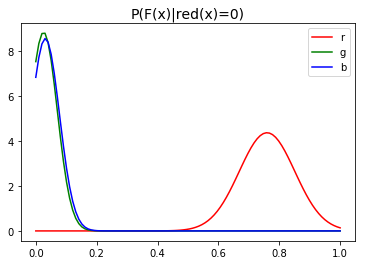

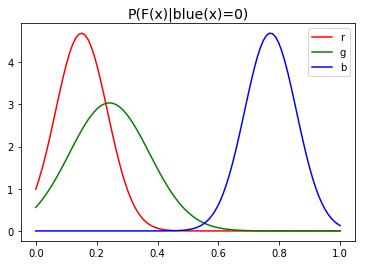

In [16]:
for cm in standard_agent.colour_models.values():
    test_colour_model(cm)
    cm.draw()

In [17]:
for cm in exp.test_colour_models('agents.CorrectingAgent_1'):
    pass

True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
True Label  B=1 B=0
Predict B=1| 9 | 7 |
        B=0| 0 | 26 |


True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
True Label  B=1 B=0
Predict B=1| 9 | 7 |
        B=0| 0 | 26 |


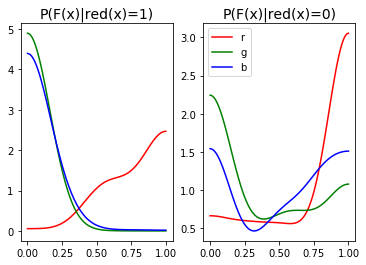

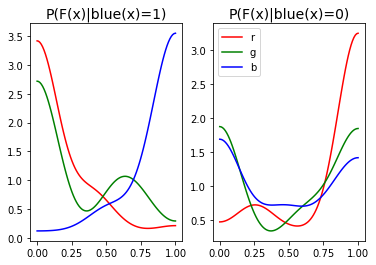

In [4]:
for cm in kde_agent.colour_models.values():
    test_colour_model(cm)
    cm.draw(draw_both=True)

In [16]:
red_cm = kde_agent.colour_models['red']
blue_cm = kde_agent.colour_models['blue']

In [15]:
colour_probs(red_cm )

{'blue': {'blue': 0.002281876810714176,
  'cornflowerblue': 0.00023490452076325598,
  'darkblue': 0.019475451912440097,
  'deepskyblue': 1.9909168843240656e-06,
  'dodgerblue': 2.8392475101481518e-05,
  'mediumblue': 0.003653036366166264,
  'midnightblue': 0.08446438775273457,
  'navy': 0.03359476398990681,
  'royalblue': 0.0017086186550483056},
 'green': {'darkolivegreen': 0.3940258298707034,
  'forestgreen': 0.010721760846821164,
  'green': 0.016622626016051113,
  'greenyellow': 0.0004921078862948446,
  'lawngreen': 0.0003875842953791002,
  'limegreen': 0.000560933486191385,
  'olivedrab': 0.09178987809383062,
  'palegreen': 1.0592952087310698e-05,
  'seagreen': 0.007987042828151089,
  'yellowgreen': 0.006851482791272102},
 'orange': {'bisque': 4.415826046041213e-06,
  'darkorange': 0.06319295753059122,
  'orange': 0.013998222210288035},
 'pink': {'deeppink': 0.11383792342765967,
  'fuchsia': 0.021143389642999635,
  'hotpink': 0.007327613407219992,
  'lightpink': 5.171467029388196e-0

In [17]:
colour_probs(blue_cm ) # miss classifying all of the purples and sea green. 
# All of the red and blue are the highest probability colours, but the purples are too high. 

{'blue': {'blue': 0.9629906547705098,
  'cornflowerblue': 0.8476255191488874,
  'darkblue': 0.9005035065544369,
  'deepskyblue': 0.939540804569072,
  'dodgerblue': 0.9454156308313998,
  'mediumblue': 0.9514661673889869,
  'midnightblue': 0.8317985838939157,
  'navy': 0.8918709640347369,
  'royalblue': 0.857137480642408},
 'green': {'darkolivegreen': 0.2448817448943098,
  'forestgreen': 0.40039826415772733,
  'green': 0.45374084446169916,
  'greenyellow': 0.009865927530535319,
  'lawngreen': 0.01805273751322001,
  'limegreen': 0.19342530217134626,
  'olivedrab': 0.20726113370329963,
  'palegreen': 0.1302404589598932,
  'seagreen': 0.6656680961881875,
  'yellowgreen': 0.07657274578712193},
 'orange': {'bisque': 0.029716534878622452,
  'darkorange': 0.00761882965232075,
  'orange': 0.006648708416657918},
 'pink': {'deeppink': 0.08211281858602698,
  'fuchsia': 0.19496385749122902,
  'hotpink': 0.11649792262926356,
  'lightpink': 0.10253283381282192,
  'magenta': 0.19496385749122902,
  'pin

In [19]:
name_to_rgb('seagreen')
name_to_rgb('blueviolet')

array([0.5411765 , 0.16862746, 0.8862745 ], dtype=float32)

In [22]:
1/6*1/6*(5/6)**2 * 3*2*1 + 1/6**3*5/6*4 + 1/6**4

0.13194444444444448

In [23]:
1-(5/6)**4

0.5177469135802468

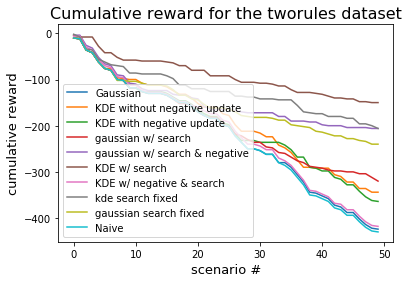

In [19]:
#exp = load_experiments([40, 41, 63, 64], 'tworules')
exp = load_experiments([41, 63, 64, 126, 125, 113, 114, 127, 134], 'tworules')
exp.plot(labels=['Gaussian', 'KDE without negative update', 'KDE with negative update', 
                 'gaussian w/ search', 'gaussian w/ search & negative', 'KDE w/ search', 
                 'KDE w/ negative & search', 'kde search fixed', 'gaussian search fixed', 'Naive'])

In [3]:
standard_agent_rf = exp.results_files['agents.CorrectingAgent_0']
kde_agent_rf = exp.results_files['agents.CorrectingAgent_1']
kde_agent_rf_neg = exp.results_files['agents.CorrectingAgent_2']
standard_agent = standard_agent_rf.load_agent()
kde_agent = kde_agent_rf.load_agent()
kde_agent_neg = kde_agent_rf_neg.load_agent()

In [12]:
standard_agent.colour_models

{'blue': <prob_model.ColourModel at 0x7f34f15617f0>,
 'red': <prob_model.ColourModel at 0x7f34f15614e0>}

True Label  G=1 G=0
Predict G=1| 10 | 3 |
        G=0| 0 | 29 |
True Label  Y=1 Y=0
Predict Y=1| 3 | 9 |
        Y=0| 0 | 30 |
True Label  R=1 R=0
Predict R=1| 5 | 2 |
        R=0| 0 | 35 |
True Label  B=1 B=0
Predict B=1| 9 | 15 |
        B=0| 0 | 18 |


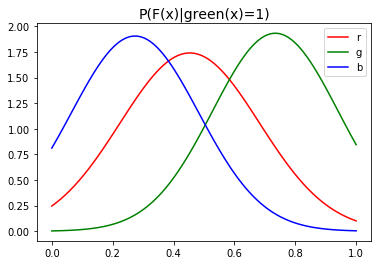

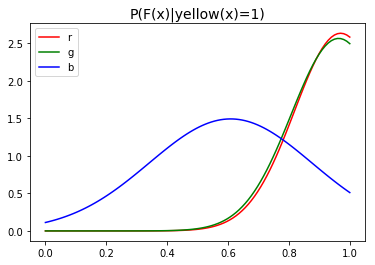

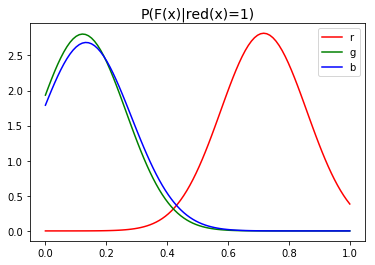

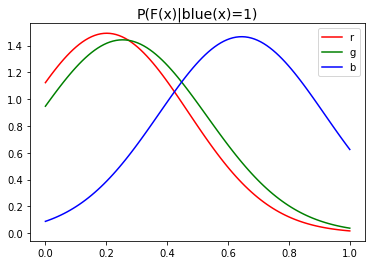

In [4]:
for cm in standard_agent.colour_models.values():
    test_colour_model(cm)
    cm.draw()

True Label  G=1 G=0
Predict G=1| 10 | 3 |
        G=0| 0 | 29 |
53
True Label  Y=1 Y=0
Predict Y=1| 3 | 4 |
        Y=0| 0 | 35 |
43
True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
36
True Label  B=1 B=0
Predict B=1| 9 | 4 |
        B=0| 0 | 29 |
38


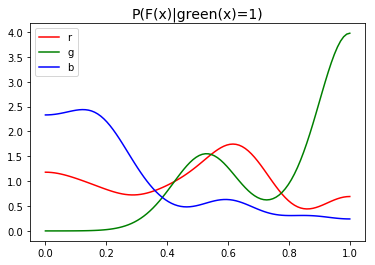

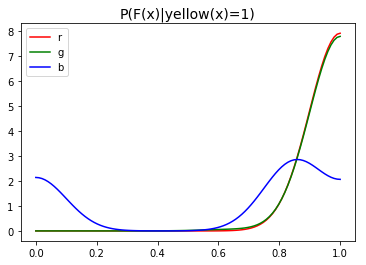

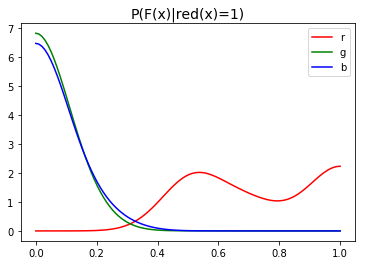

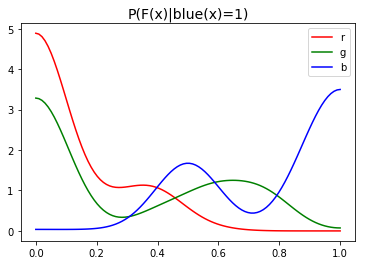

In [4]:
for cm in kde_agent.colour_models.values():
    test_colour_model(cm)
    cm.draw()
    print(len(cm.data))

True Label  G=1 G=0
Predict G=1| 10 | 1 |
        G=0| 0 | 31 |
45
True Label  Y=1 Y=0
Predict Y=1| 3 | 3 |
        Y=0| 0 | 36 |
40
True Label  R=1 R=0
Predict R=1| 5 | 1 |
        R=0| 0 | 36 |
46
True Label  B=1 B=0
Predict B=1| 9 | 2 |
        B=0| 0 | 31 |
48


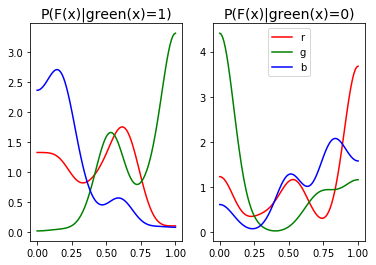

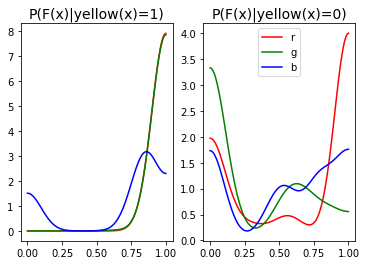

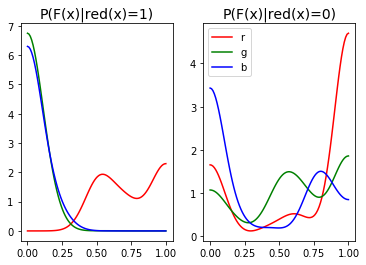

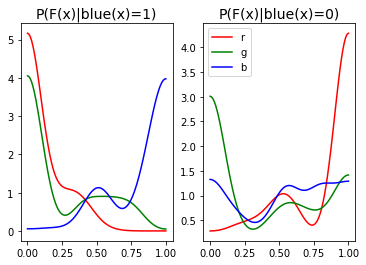

In [5]:
for cm in kde_agent_neg.colour_models.values():
    test_colour_model(cm)
    cm.draw(draw_both=True)
    print(len(cm.data))

In [6]:
r = kde_agent_neg.colour_models['red']

In [15]:
r.bw = lambda x: 0.05
r.update([0,0,0], 0.00000000001)

True Label  G=1 G=0
Predict G=1| 10 | 2 |
        G=0| 0 | 30 |
45
True Label  Y=1 Y=0
Predict Y=1| 3 | 5 |
        Y=0| 0 | 34 |
40
True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
50
True Label  B=1 B=0
Predict B=1| 9 | 3 |
        B=0| 0 | 30 |
48


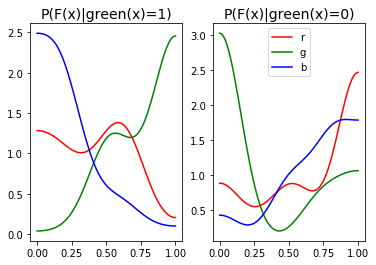

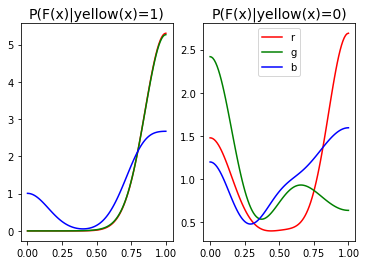

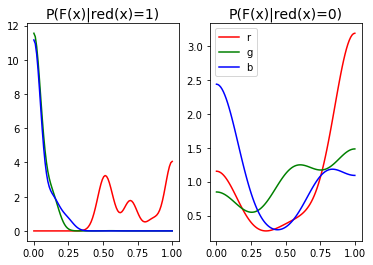

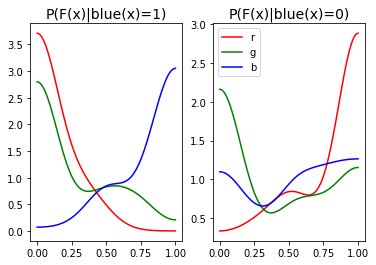

In [16]:
for cm in kde_agent_neg.colour_models.values():
    test_colour_model(cm)
    cm.draw(draw_both=True)
    print(len(cm.data))

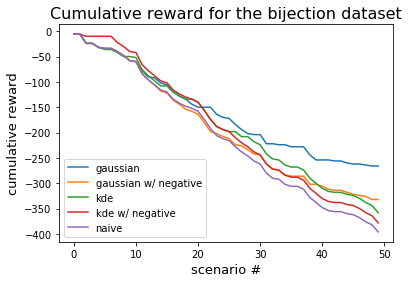

In [10]:
exp = load_experiments([76, 77, 68, 69], 'bijection')
exp.plot(labels=['gaussian', 'gaussian w/ negative', 'kde', 'kde w/ negative', 'naive'])

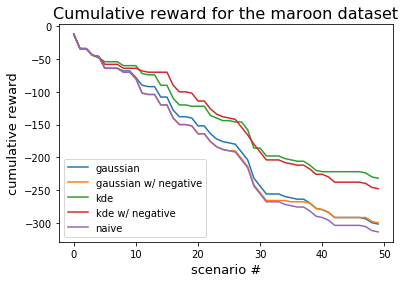

In [13]:
exp = load_experiments([78, 79, 66, 67], 'maroon')
exp.plot(labels=['gaussian', 'gaussian w/ negative', 'kde', 'kde w/ negative', 'naive'])